# Importing libraries

In [20]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
%matplotlib inline

# Data Exploration and Visualization

In [42]:
df = pd.read_csv("Training Data.csv")
print(df.head())
df.info()
df.describe()

   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0   

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


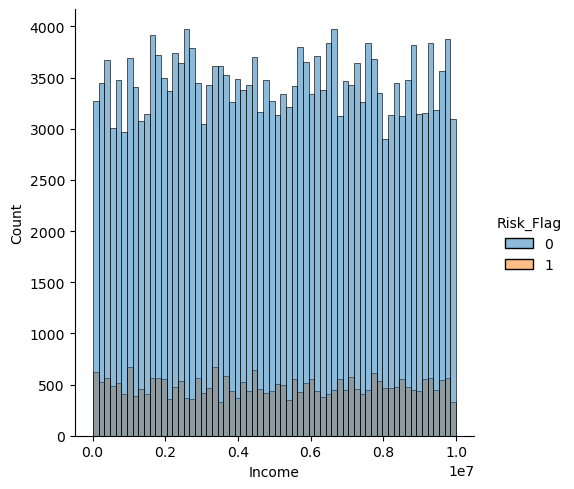

In [61]:
sns.displot(data = df, x = df.Income, hue = df.Risk_Flag)

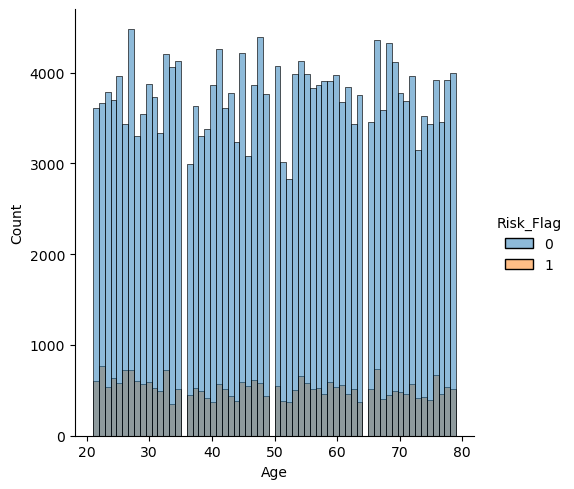

In [62]:
sns.displot(data = df, x = df.Age, hue = df.Risk_Flag)

<Axes: xlabel='Car_Ownership', ylabel='count'>

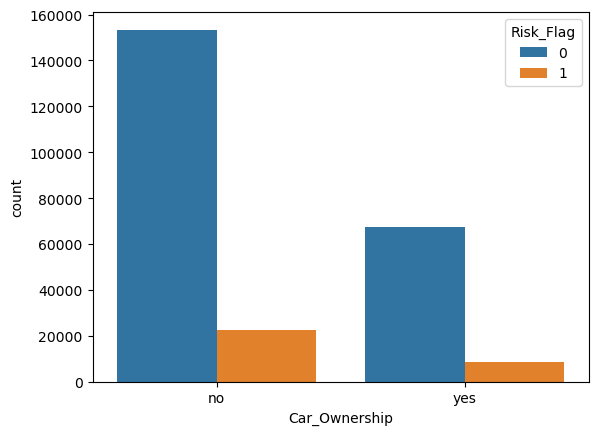

In [55]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df)

<Axes: xlabel='Married/Single', ylabel='count'>

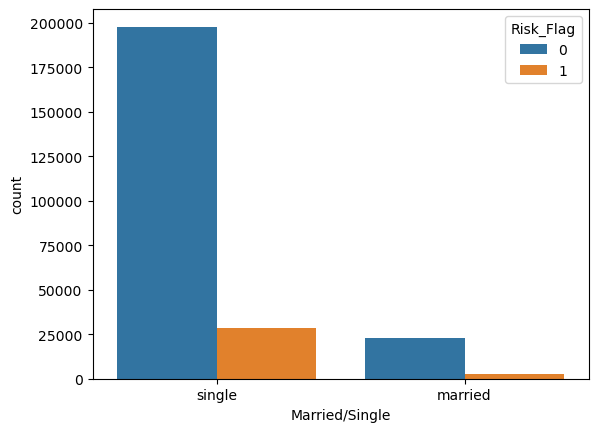

In [56]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)

C:\Users\Adam\AppData\Local\Temp\ipykernel_6136\726115684.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

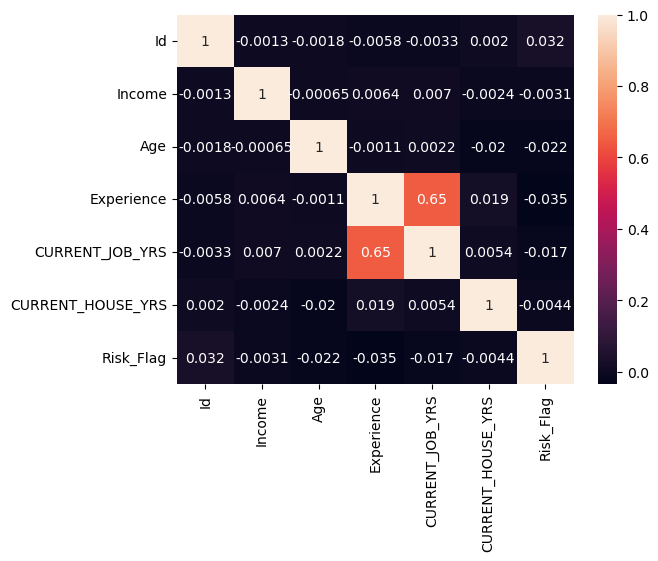

In [25]:
#Shows corelation between variables
sns.heatmap(df.corr(), annot=True)

In [68]:
print(df.Profession.unique()[:10])
len(df.Profession.unique())


['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician']


51

In [67]:
df.groupby("Profession")["Income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False).T

Profession,Petroleum_Engineer,Psychologist,Designer,Scientist,Surgeon,Comedian,Chemical_engineer,Mechanical_engineer,Artist,Financial_Analyst,...,Design_Engineer,Chef,Engineer,Physician,Magistrate,Civil_engineer,Official,Drafter,Flight_attendant,Police_officer
min,2.292100e+04,3.322400e+04,1.284100e+04,1.379200e+04,1.821500e+04,1.342900e+04,2.692600e+04,3.705700e+04,3.129700e+04,1.766000e+04,...,4.476100e+04,1.173500e+04,1.031000e+04,1.260800e+04,1.621200e+04,2.567400e+04,1.362900e+04,1.493600e+04,1.169500e+04,1.322000e+04
max,9.968353e+06,9.985964e+06,9.996946e+06,9.975985e+06,9.995445e+06,9.984983e+06,9.984718e+06,9.990505e+06,9.976619e+06,9.990776e+06,...,9.962923e+06,9.977117e+06,9.993649e+06,9.987805e+06,9.982430e+06,9.992141e+06,9.993041e+06,9.999180e+06,9.979070e+06,9.999938e+06
mean,5.443310e+06,5.357795e+06,5.336802e+06,5.282710e+06,5.235359e+06,5.199539e+06,5.189805e+06,5.175032e+06,5.164765e+06,5.145753e+06,...,4.840221e+06,4.839915e+06,4.814755e+06,4.780384e+06,4.769920e+06,4.755441e+06,4.737617e+06,4.654805e+06,4.592177e+06,4.502916e+06


In [70]:
df.CITY = df.CITY.str.extract("([A-Za-z]+)")
print(df.CITY.unique()[:10])
len(df.CITY.unique())

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli' 'Jalgaon'
 'Tiruppur' 'Jamnagar' 'Kota' 'Karimnagar']


316

In [71]:
df.STATE = df.STATE.str.extract("([A-Za-z]+)")
print(df.STATE.unique()[:10])
len(df.STATE.unique())

['Madhya' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil' 'Gujarat' 'Rajasthan'
 'Telangana' 'Bihar' 'Andhra']


28

In [19]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil,3,14,1


In [21]:
df1 = df
features = ['Married/Single','Car_Ownership','Profession','CITY','STATE']
label_encoder = LabelEncoder()

for col in features:
    df1[col] = label_encoder.fit_transform(df[col])

In [22]:
df1 = pd.get_dummies(df1, columns = ["House_Ownership"])
df1.drop(["Id"],axis=1,inplace=True)

In [23]:
df1.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,1,0,33,250,13,3,13,0,0,0,1
1,7574516,40,10,1,0,43,226,14,9,13,0,0,0,1
2,3991815,66,4,0,0,47,8,12,4,10,0,0,0,1
3,6256451,41,2,1,1,43,53,17,2,12,1,0,0,1
4,5768871,47,11,1,0,11,295,22,3,14,1,0,0,1
